# Stochastic Galerkin
Recall our random differential equation 
\begin{align}
\begin{array}{rclll}
-\operatorname{div}\kappa(x, \omega)\nabla u(x, \omega) & = & f(x)& \text{in } D\times\Omega \\
                                     u(x, \omega) & = & 0 & \text{on } \partial D\times\Omega.
\end{array}                                     
\end{align}
***
For the weak formulation let us denote the variational space $V=L^2(\Omega, \mathbb{P}; H_0^1(D))$ and define the (bi)linear forms $a\colon V\times V\mapsto \mathbb{R}$ and $\ell\colon V\mapsto \mathbb{R}$ with
\begin{align}
a(u,v) &:= \mathbb{E}\left[
\int\limits_{D}\kappa(x, \cdot)\nabla u(x, \cdot)\cdot\nabla v(x, \cdot)\ \mathrm{d}x
\right],\\
\ell(v) &:= \mathbb{E}\left[
\int\limits_{D}f(x)v(x, \cdot)\ \mathrm{d}x.
\right]
\end{align}
Now, assume $\kappa$ is uniformly bounded: There exists $\underline{\kappa},\overline{\kappa}>0$ s.t. 
\begin{align}
0< \underline{\kappa} < \kappa(\omega,x) < \overline{\kappa} < \infty.
\end{align}

Let $f\in L^2(\Omega, \mathbb{P}; L^2(D))$, then there exists a unique solution $u\in V$ that solves
\begin{align}
a(u,v) = \ell(v),\quad\forall v\in V.
\end{align}

## Parametric representation

*Note that an approximation of the above formulation may not be convenient in a Galerkin framework, since integrals involve an abstract set $\Omega$.*

Recall that the random diffusion field $\kappa$ can be reparameterised as a KLE
\begin{align}
\kappa(x, \omega) = \kappa(x, \xi(\omega)) = \kappa_0(x)+\sum\limits_{m=1}^\infty \kappa_m(x)\xi_i(\omega), \quad \text{a.e. in } D\times\Omega 
\end{align}
and by the *Doob-Dynkin Lemma* $u$ can be written in terms of $\xi(\omega)$ as well.
We can thus reformulate the problem in the image space of $\xi$. For that let

$$
\Gamma := \operatorname{img}\xi\subset\mathbb{R}^\infty
$$

and denote by $\mu$ the distribution of $\xi$.

***

Identifying $\xi$ with its images ($y=\xi(\omega)\in \Gamma$), we can now solve the *parametric* differential equation

\begin{align}
\begin{array}{rclll}
-\operatorname{div}\kappa(x, y)\nabla u(x, y) & = & f(x)& \text{in } D\times\Gamma \\
                                      u(x, y) & = & 0   & \text{on } \partial D\times\Gamma
\end{array}
\end{align}

in the (push forward) space $V := L^2(\Gamma,\mu; H_0^1(D)) \simeq H^1_0(D) \otimes L^2(\Gamma,\mu;\mathbb{R})$.

## Discretization

As a first step, we approximate the coefficient by a finite sum of $M+1$ terms
\begin{align}
\kappa(x, y) \approx \kappa^M(x, y) := \kappa_0(x) + \sum\limits_{m=1}^M \kappa_m(x)y_m.
\end{align}

The resulting (approximated) *parametric* differential equation can be solved on the space 

$$
V^M := L^2(\Gamma^M,\mu^M; H_0^1(D)) \simeq H^1_0(D) \otimes L^2(\Gamma^M,\mu^M;\mathbb{R})
$$

with $\Gamma^M := \operatorname{img}(\xi_i)_{i=1}^M$ and $\mu^M$ the joint measure of $(\xi_i)_{i=1}^M$.

***

*Note that $V^\infty = V$. So that, in the following, we will only have to write the equations for $M \in \mathbb{N}\cup\{\infty\}$.*

Let $S^M := \{P_\alpha,\alpha \in\mathbb{N}_{c}^M\}$ be a basis $L^2(\Gamma^M,\mu^M;\mathbb{R})$ and let $X_h=\operatorname{span}\{\phi_i\}$ be a discrete subspace of $H^1_0$. <br>
Finally, let $S_k^M\subset S_M$ be a finite subset (e.g. involving multi-indices with $\alpha<k$ only).
Now, a discrete (approximation) space $V_{k,h}^M\subset V$ for a given truncation level $M$ may be defined as

\begin{align}
V_{k,h}^M := X_h \otimes S_k^M.
\end{align}

### Generalised Polynomial chaos expansion (gPCE)

A special case of discrete subspace $S^M$ may be given in terms of orthonormal polynomials, w.r.t. to the underlying measure $\mu^M$ (if such a basis exists). In this situation, any function $u\in V^M$ can be written in terms of a polynomial chaos expansion

\begin{align}
u(x, y) = \sum\limits_{\alpha\in\mathbb{N}^M} u_\alpha(x)P_\alpha(y)
\end{align}
with functions $u_\alpha\in H_0^1(D)$ and polynomials $P_\alpha$.

### Polynomial chaos expansion (the *i.i.d.* case)

In what follows we assume $(\xi_i)_{i=1}^M$ to be *i.i.d.* and denote by $\Gamma_m := \operatorname{img}\xi_m$ and by $\mu_m$ the probability measure of $\xi_m$. <br>
Then $\Gamma^M := \times_{m}^M\Gamma_m$ and $\mu^M=\otimes_{m=1}^M\mu_m$ and consequently $L^2(\Gamma^M,\mu^M) \simeq \otimes_{m=1}^M L^2(\Gamma_m,\mu_m)$.

Assuming that each $L^2(\Gamma_m,\mu_m)$ has an orthonormal polynomial basis $(P^m_i)_{i=1}^\infty$, we can define a polynomial basis of $L^2(\Gamma^M,\mu^M)$ by tensorization
\begin{align}
P_\alpha(y) := \prod\limits_{m=1}^M P^m_{\alpha_m}(y_m).
\end{align}

Then, a discrete basis is given by $S_k^M = \{P_\alpha, \alpha \le k\}$ for some $k\in\mathbb{N}^M$.

***

In the full discretization, any $u_h\in V^M_{k,h} = X_h \otimes S^M_k$ has a representation

\begin{align}
u_h(x,y) = \sum\limits_{i=1}^{\operatorname{dim} X_h}\sum\limits_{\alpha \le k} c[i,\alpha] \phi_i(x)P_\alpha(y)
\end{align}

with a coefficient tensor $c \in \mathbb{R}^{\operatorname{dim} X_h \times k_1 \times \cdots \times k_M}$.

## Discrete equation

With the full discretisation the weak formulation reads:

***

Find $u_{h} \in V_{h,k}^M$ such that for all $v_h\in V_{k,h}^M$

\begin{align}
\int\limits_{\Gamma^M}\int\limits_{D} \kappa^M(x,y)\nabla u_h(x,y)\cdot \nabla v_h(x,y)\ \mathrm{d}x\ \mathrm{d}\mu^M(y)
&=\int\limits_{\Gamma^M}\int\limits_{D} f(x) v_h(x,y)\ \mathrm{d}x\ \mathrm{d}\mu^M(y).
\end{align}

***

Taking ansatz and trial function of the form $u_h = \phi_i(x)P_\alpha(y)$ and $v_h(x,y) = \phi_j(x) P_{\beta}(y)$ 
the right hand side can be written as

\begin{align}
\int\limits_{\Gamma^M}\int\limits_{D} f(x) v_h(x,y)\ \mathrm{d}x\ \mathrm{d}\mu^M(y)
= \int\limits_{D} f(x) \phi_j(x)\ \mathrm{d}x \int\limits_{\Gamma^M} P_\beta(y)\ \mathrm{d}\mu^M(y)
\end{align}

and the left hand side can be written as

\begin{align}
&\int\limits_{\Gamma^M} \int\limits_D \left(\kappa_0(x) + \sum\limits_{m=1}^M \kappa_m(x)y_m\right) \nabla u_h(x,y)\cdot \nabla v_h(x,y)\ \mathrm{d}x\ \mathrm{d}\mu^M(y) \\
=& \sum\limits_{m=0}^M\int\limits_D \kappa_m(x)\nabla \phi_i(x)\cdot \nabla\phi_j(x)\ \mathrm{d}x
\int\limits_{\Gamma^M} K_m(y) P_\alpha(y) P_\beta(y)\ \mathrm{d}\mu^M(y).
\end{align}

with $K_0(y) = 1$ and $K_m(y) = y_m$. 

***

Therefore, the discrete formulation is equivalent to tensorised matrix equation

\begin{align}
\mathcal{A}\mathcal{U} = \mathcal{F}
\end{align}

with

\begin{align}
\mathcal{A} = \sum\limits_{m=0}^M A_m\otimes \mathcal{B}_m
\quad\text{and}\quad
\mathcal{F} = f\otimes e_1\otimes\cdots\otimes e_1
\end{align}
where
\begin{align}
(A_m)_{ij} &= \int\limits_{D}\kappa_m(x)\nabla \phi_i(x)\cdot\nabla\phi_j(x)\ \mathrm{d}x \\
(\mathcal{B}_m)_{\alpha\beta} &= \int\limits_{\Gamma^M} K_m(y) P_\alpha(y) P_\beta(y)\ \mathrm{d}\mu^M(y).
\end{align}

## Implementation

The $A_m$ can be assembled using standard FEM software.
To build the $\mathcal{B}_m$ matrices note that for $m > 0$

\begin{align}
\int\limits_{\Gamma^M} K_m(y) P_\alpha(y) P_\beta(y)\ \mathrm{d}\mu^M(y) =
% \left( 
\prod\limits_{\substack{1 \le k \le M \\ k\ne m}} \int\limits_{\Gamma_k} P^k_{\alpha_k}(y_k) P^k_{\beta_k}(y_k)\ \mathrm{d}\mu_k(y_k) 
% \right)
\cdot \int\limits_{\Gamma_m} y_m P^m_{\alpha_m}(y_m) P^m_{\beta_m}(y_m)\ \mathrm{d}\mu_m(y_m)
\end{align}

and for $m = 0$

\begin{align}
\int\limits_{\Gamma^M} K_m(y) P_\alpha(y) P_\beta(y)\ \mathrm{d}\mu^M(y) =
% \left( 
\prod\limits_{1 \le k \le M} \int\limits_{\Gamma_k} P^k_{\alpha_k}(y_k) P^k_{\beta_k}(y_k)\ \mathrm{d}\mu_k(y_k) .
% \right)
\end{align}

***

Using the orthonormality of the basis functions we can compute

$$
\int\limits_{\Gamma_k} P^k_{i}(y_k) P^k_{j}(y_k)\ \mathrm{d}\mu_k(y_k) =  \delta_{ij}.
$$
and consequently
$$
\mathcal{B}_0 = \otimes_{k=1}^m I
\quad\text{and}\quad
\mathcal{B}_m = (\otimes_{k<m} I) \otimes B_m \otimes (\otimes_{k>m} I),
$$

with the triple product polynomial matrix
\begin{align}
(B_m)_{kl} = \int\limits_{\Gamma_m} y_m P_{k}(y_m) P_{l}(y_m)\mu(y_m).
\end{align}


## Exercise 

Assume that $\xi_i$ are i.i.d. uniform on $(-1,1)$.
In this case $\mathrm{d}\mu_m(y_m) = \frac{1}{2}\mathrm{d}y_m$ and an orthonormal polynomial basis is given by the Legendre polynomials.
These are available in most numerical libraries and can be used to compute 
the matrices $B_m$, which we will provide.

As a discrete space for the deterministic component we will use a `FEniCS` finite element space and provide the matrices $A_m$ as well.

- Compute $\mathcal{A}$ and $\mathcal{F}$ for $M=1,2,3$ and the given diffusion coefficient in *CoefField*.
- Using the generated $\mathcal{A}$ and $\mathcal{F}$, 
  solve the system for $\mathcal{U}$ and calculate the expectation.
- Compare your soultion with a MC estimate of the expectation.
- Play around with basis polynomials up to degree $4$.

In [1]:
from __future__ import division
import numpy as np
import scipy.sparse as sps                     # used for sparse matrices
import scipy.sparse.linalg as spsl             # solve the sparse LES
import numpy.polynomial.legendre as leg        # polynomial evaluation and quadrature

from dolfin import *
parameters.linear_algebra_backend = 'Eigen'    # fenics internal matrix system

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from coef_field import CoefField               # CoefField of tutorial 1

In [2]:
N = 10                                         # physical basis elements
M = 3                                          # stochastic dimensions
max_nu = 4                                     # maximal polynomial degree - 1
coef = CoefField(1.0, M)                       # parametric Coefficient field

In [3]:
mesh = UnitSquareMesh(N, N)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, 'on_boundary')

# obtain indices for boundary dofs and inner dofs
bc_dof = bc.get_boundary_values()
ip_idx = set(range(V.dim())) - set(bc_dof.keys())
ip_idx = np.array(list(ip_idx))


# evaluate normalised Legendre polynomial of order nu at x
def polyval(x, nu):
    # the polynomials given by `leg.legval` are not normalized
    fn = np.sqrt((2*nu+1))
    return leg.legval(x, [0]*nu+[1])*fn

# build physical component tensors
def build_Am(kappa, V):
    u, v = TrialFunction(V), TestFunction(V)    
    # assemble system matrix
    A = assemble( inner(kappa*grad(u), grad(v)) * dx )
    # cast `a` to scipy.sparse.csr_matrix
    A = sps.csr_matrix(as_backend_type(A).sparray())
    # remove boundary dofs
    A = A[ip_idx][:, ip_idx]
    return A

# build stochastic component tensor
def build_Bm(max_nu):
    nodes, weights = leg.leggauss(max_nu+2)
    Bm = np.empty((max_nu, max_nu))
    for i in range(max_nu):
        for j in range(max_nu):
            # the factor 0.5 is due to the fact that the density is constant 0.5 on the domain (-1,1)
            Bm[i,j] = 0.5 * np.sum(weights * nodes * polyval(nodes, i) * polyval(nodes, j))
    return Bm

# build right hand side vector
def build_F(V):
    f = Constant(1)
    v = TestFunction(V)
    lf = assemble(inner(f, v)*dx)
    bc.apply(lf)
    lf = lf.array()[ip_idx]
    return lf

In [4]:
def Am(m):
    # get the m-th term `a_m` of the KLE of `a`
    am = coef.get_am(m, V)
    return build_Am(am, V)
    
def Bm(m):
    I = sps.eye(max_nu, max_nu)
    Bms = [I]*M
    if m > 0: Bms[m-1] = build_Bm(max_nu)
    return Bms

def kron_list(matrices):
    lm = len(matrices)
    if lm == 1: return matrices[0]
    lm //= 2
    return sps.kron(kron_list(matrices[:lm]), kron_list(matrices[lm:]))

# build lhs matrix
A = 0
for m in range(M+1):
    A = A + kron_list([Am(m)] + Bm(m))
A = sps.csr_matrix(A)

In [5]:
# build rhs vector
F = build_F(V)
unit_v = np.zeros(max_nu)
unit_v[0] = 1
for m in range(1, M+1):
    F = np.kron(F, unit_v)

# solve the sparse linear system
u = spsl.spsolve(A, F)

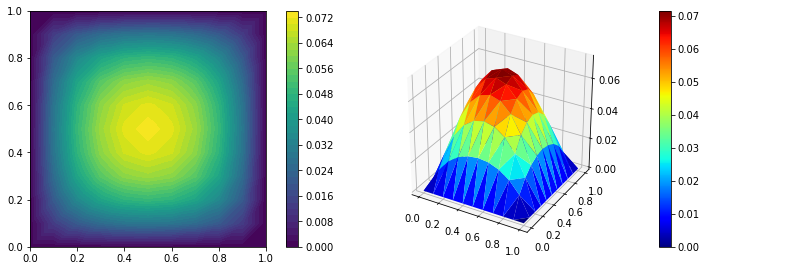

In [6]:
u_mean = Function(V)
# reshape the solution vector into a tensor
u.shape = [len(ip_idx)]+[max_nu]*M
# the coefficients for the expectation are now in u[:, 0, 0, ...]
# in this special case it is easier to access them in the following shape
u.shape = len(ip_idx), -1
u_mean.vector()[ip_idx] = u[:, 0].copy()

mpl.rcParams['figure.figsize'] = [12, 4]
fig = plt.figure()
ax = plt.subplot(121)
im = plot(u_mean)
plt.colorbar(im)

ax = plt.subplot(122)
im = plot(u_mean, mode="warp")
plt.colorbar(im)
ax.set_axis_off()
plt.tight_layout()

In [7]:
# define a simple solver as in the first tutorial
def solution(kappa, f):
    u = TrialFunction(V)
    v = TestFunction(V)
    a = inner(kappa*grad(u), grad(v))*dx
    L = f*v*dx

    u = Function(V)
    solve(a == L, u, bc)
    return u.vector().array()

# sample reference solution
u_ref = np.zeros(V.dim())
N_samples = 1000
for m in range(N_samples):
    y = np.random.rand(M)*2 -1
    kappa = coef.realisation(y, V)
    u_ref += solution(kappa, Constant(1))
u_ref /= N_samples

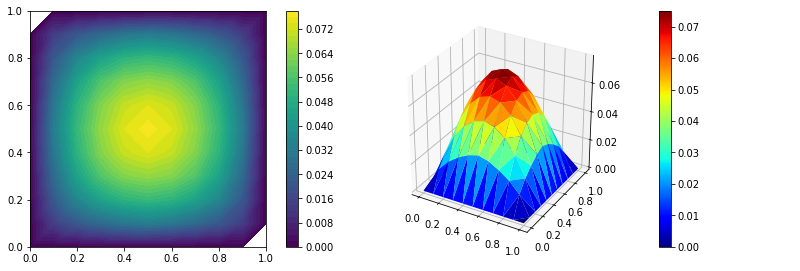

In [8]:
u_mean_ref = Function(V)
u_mean_ref.vector().set_local(u_ref)

fig = plt.figure()
ax = plt.subplot(121)
im = plot(u_mean_ref)
plt.colorbar(im)

ax = plt.subplot(122)
im = plot(u_mean_ref, mode="warp")
plt.colorbar(im)
ax.set_axis_off()
plt.tight_layout()

End of part IV. Next: *Tensor Introduction*

<div style="text-align: right; color: #a5a9af"> &copy; Robert Gruhlke, Manuel Marschall, Phillip Trunschke, 2018-2019</div>